# Digit Recognition

## 1. Loading Dataset

In [1]:
from keras.datasets import mnist


In [5]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [6]:
import matplotlib.pyplot as plt

## 2. Exploring the Data

In [8]:
print("x_train.shape: ",x_train.shape)
print("y_train.shape: ",y_train.shape)
print("x_test.shape: ",x_test.shape)
print("y_test.shape: ",y_test.shape)

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


In [9]:
# single image

single_img=x_train[5]

In [11]:
single_img     # arrays of number representing each pixel

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

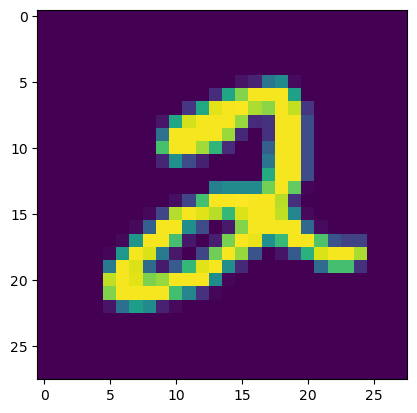

In [20]:
plt.imshow(single_img)

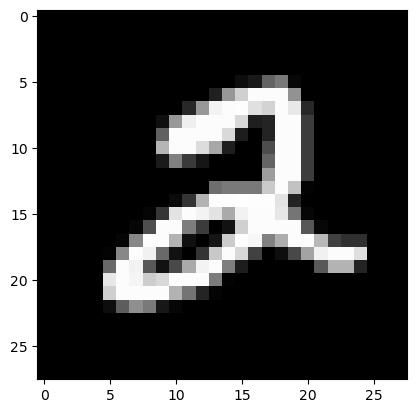

In [19]:
# as it is mixing the numbers, so wel will be giving it the cmap=grey
plt.imshow(single_img, cmap='gray')

**So our dataset comprises of images of 28x28 and these are gray scale images**

## 3. Preprocessing

###  Labels

In [22]:
y_train
# as the labels are continuous values, so without pre-processing model will think it a regression problem

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_train.shape

(60000,)

In [26]:
y_example=to_categorical(y_train)

In [28]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

**now this is converted to the list of each number having one at the index of number (1 at 5th index for 5) and all zeros else**

In [29]:
y_example.shape

(60000, 10)

In [35]:
 y_example[0]       # 1 at 5th index for 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

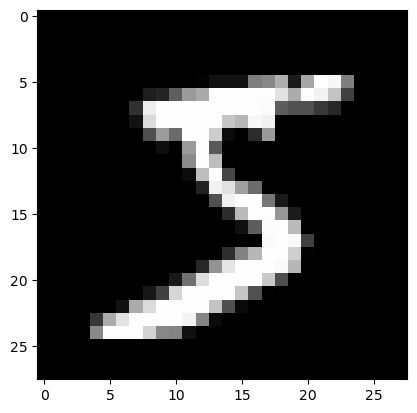

In [36]:
plt.imshow(x_train[0],cmap='gray')

In [49]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

# 10 is for the classes(number 1-9) in the data 

In [38]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [39]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## 4. Preprocessing the X-Data (Normalize)

These are the data values from x_train

In [41]:
single_img.max()

255

In [42]:
single_img.min()

0

In [44]:
x_train=x_train/255
x_test=x_test/255

# dividing the x_train and x_test with maximum values for normalizing

In [45]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

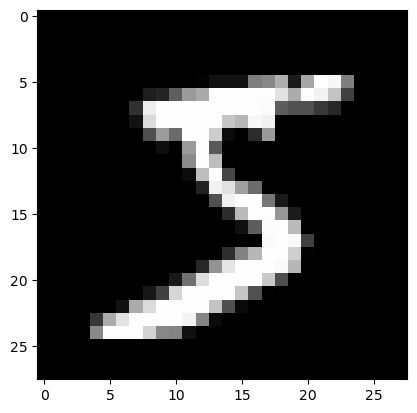

In [48]:
plt.imshow(x_train[0],cmap="gray")
# normalizing didn't effect the picture size, although range has been reduced for all number values of pixels

## 5. Reshaping the Data

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
x_test.shape

(10000, 28, 28)

In [52]:
# adding the colour channel
x_train=x_train.reshape(60000,28,28,1)

In [53]:
x_train.shape

(60000, 28, 28, 1)

In [54]:
x_test=x_test.reshape(10000,28,28,1)

In [56]:
x_test.shape

(10000, 28, 28, 1)

# 6. Training the Model

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten

### Convolutional Neural Network

In [78]:
model=Sequential()

# 1st convolution layer
# no. of filter=32, kernel_size=(3,3) - kernal size is size of filter
model.add(Conv2D(filters=24, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

# 2nd max pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#  flatten the extracted  pixels in 1D array
model.add(Flatten())

# simple Neural Network
model.add(Dense(128,activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))         # 10 neurons as we ahve 10 classes- softmax for multiclasss-classification

model.compile(loss='categorical_crossentropy',
              optimizer='adam',                      #optimizer='rmsprop',
              metrics=['accuracy']
              )



C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 24)          │             240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 24)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4056)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         519,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,826 (1.99 MB)

 Trainable params: 520,826 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.fit(x_train,y_cat_train,epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9572 - loss: 0.1402
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9633 - loss: 0.1259
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9656 - loss: 0.1159
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9686 - loss: 0.1079
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9697 - loss: 0.0996
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9717 - loss: 0.0901
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9750 - loss: 0.0827


## 7. Evaluating the Model

In [82]:
model.metrics_names

['loss', 'compile_metrics']

In [83]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9617 - loss: 21.3436


[18.55647087097168, 0.9666000008583069]

**Classification  Report:**

In [104]:
from sklearn.metrics import classification_report

In [105]:
import numpy as np

predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [106]:
predictions

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [107]:
predicted_classes=np.argmax(predictions, axis=1)

In [108]:
predicted_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [109]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [110]:
report=classification_report(y_test,predicted_classes)

In [111]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.94      0.98      0.96       982
           5       0.99      0.92      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.94      0.97      0.95       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

